In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from keras.applications.vgg16 import VGG16
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Loading Datasets

In [28]:
#Resize all the images to this
IMAGE_SIZE = [224,224]

train_path = "/content/drive/MyDrive/Datasets/Datasets/Train"
test_path = "/content/drive/MyDrive/Datasets/Datasets/Test"

In [29]:
#import vgg16 library & add preprocessing layer to the front of vgg
resnet = ResNet50(input_shape= IMAGE_SIZE + [3] , weights='imagenet', include_top = False)

In [30]:
for layer in resnet.layers:
    layer.trainable = False


In [31]:
#useful for getting number of o/p classes 
folders = glob("/content/drive/MyDrive/Datasets/Datasets/Train/*")

In [32]:
#our layers- we can add more

x = Flatten()(resnet.output)

In [33]:
x

<KerasTensor: shape=(None, 100352) dtype=float32 (created by layer 'flatten_1')>

In [34]:
prediction = Dense(len(folders), activation = "softmax")(x)
prediction

<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'dense_1')>

In [35]:
#creating a models object

model = Model(inputs = resnet.input, outputs = prediction) 

In [36]:
#structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [37]:
model.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"]
)

In [39]:
#image datag generator for import the image from dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True   
)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [44]:
#make sure u provide the same target size as initialized for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Datasets/Train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode =  'categorical')

Found 64 images belonging to 3 classes.


In [45]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Datasets/Test',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode =  'categorical')

Found 58 images belonging to 3 classes.


In [46]:
training_set

In [47]:
len(training_set)

2

In [48]:
len(test_set)

2

In [49]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
2/2 [==============================] - 73s 68s/step - loss: 9.0551 - accuracy: 0.3125 - val_loss: 8.0395 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 12s 9s/step - loss: 4.9605 - accuracy: 0.3750 - val_loss: 5.4055 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 12s 9s/step - loss: 7.6164 - accuracy: 0.3906 - val_loss: 3.6886 - val_accuracy: 0.5862
Epoch 4/50
2/2 [==============================] - 12s 9s/step - loss: 6.7509 - accuracy: 0.4219 - val_loss: 2.7095 - val_accuracy: 0.5690
Epoch 5/50
2/2 [==============================] - 12s 9s/step - loss: 3.8510 - accuracy: 0.5156 - val_loss: 1.9001 - val_accuracy: 0.3103
Epoch 6/50
2/2 [==============================] - 12s 9s/step - loss: 2.1459 - accuracy: 0.5156 - val_loss: 6.7600 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 12s 9s/step - loss: 4.3785 - accuracy: 0.3906 - val_loss: 1.8334 - val_accuracy: 0.3103
Epoch 8/50
2/2 [=================

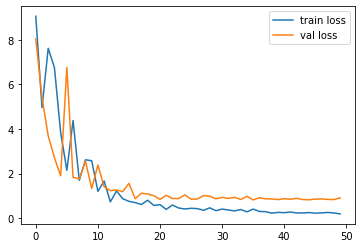

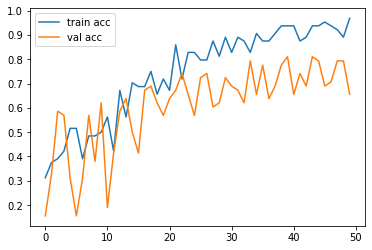

<Figure size 432x288 with 0 Axes>

In [50]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [51]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [52]:
y_pred = model.predict(test_set)

In [53]:
y_pred

array([[3.2428288e-01, 4.1798246e-01, 2.5773469e-01],
       [2.5345854e-02, 8.8741976e-01, 8.7234385e-02],
       [3.3984822e-03, 6.5379333e-01, 3.4280816e-01],
       [7.8293473e-02, 1.2854514e-04, 9.2157793e-01],
       [5.5082038e-02, 1.5856001e-01, 7.8635794e-01],
       [8.7832206e-01, 6.9371313e-02, 5.2306592e-02],
       [2.7061588e-01, 4.2597002e-01, 3.0341414e-01],
       [4.5615199e-01, 3.0777797e-01, 2.3607007e-01],
       [2.8721619e-04, 9.8859382e-01, 1.1119045e-02],
       [2.3829103e-01, 2.5037912e-01, 5.1132983e-01],
       [9.8447704e-01, 4.2000324e-03, 1.1322911e-02],
       [3.9761436e-01, 2.4597163e-01, 3.5641393e-01],
       [8.4402418e-01, 1.5156603e-01, 4.4097840e-03],
       [4.5423936e-02, 2.0609319e-03, 9.5251507e-01],
       [1.0784778e-02, 9.7224897e-01, 1.6966205e-02],
       [5.5893505e-01, 2.1566864e-02, 4.1949803e-01],
       [7.3180467e-02, 1.6141973e-01, 7.6539981e-01],
       [4.2841766e-02, 2.7350321e-01, 6.8365502e-01],
       [7.5853652e-01, 3.851

In [54]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [55]:
y_pred

array([1, 1, 1, 2, 2, 0, 1, 0, 1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 2, 1, 2,
       0, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0,
       2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 2, 2, 2, 1])

In [56]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [57]:
model=load_model('model_resnet50.h5')

In [58]:
img=image.load_img('/content/drive/MyDrive/Datasets/Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [59]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [60]:
x.shape

(224, 224, 3)

In [61]:
x=x/255

In [62]:
x

array([[[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.76862746, 0.73333335, 0.6745098 ],
        [0.8509804 , 0.8156863 , 0.75686276],
        [0.9529412 , 0.91764706, 0.85882354]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9607843 , 0.9607843 , 0.92941177],
        [0.9529412 , 0.9529412 , 0.92156863],
        [0.9490196 , 0.9490196 , 0.91764706]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9411765 , 0.9764706 , 0.972549  ],
        [0.9490196 , 0.9843137 , 0.98039216],
        [0.9490196 , 0.9843137 , 0.98039216]],

       ...,

       [[0.7411765 , 0.8117647 , 0.8980392 ],
        [0.74509805, 0.80784315, 0.8980392 ],
        [0.74509805, 0

In [63]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [64]:
model.predict(img_data)

array([[0.03932311, 0.0277099 , 0.93296695]], dtype=float32)

In [65]:
img_data

array([[[[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.264496, -116.04567 , -122.91137 ],
         [-103.18214 , -115.96331 , -122.82902 ],
         [-103.08018 , -115.86135 , -122.72706 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.00959 , -115.818214, -122.719215],
         [-103.01743 , -115.82606 , -122.72706 ],
         [-103.021355, -115.82998 , -122.73098 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-102.96645 , -115.80253 , -122.73882 ],
         [-102.95861 , -115.794685, -122.73098 ],
         [-102.95861 , -115.794685, -122.73098 ]],

        ...,

        [[-103.04096 , -115.96723 , -1

In [66]:
a=np.argmax(model.predict(img_data), axis=1)

In [67]:
a==1

array([False])